<a href="https://colab.research.google.com/github/Elizaveta0803/LabAnalitika/blob/main/%D0%9B%D0%B0%D0%B1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset7.csv to dataset7.csv


In [2]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
series = read_csv('dataset7.csv', header = 0, index_col = 0)
print(series.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [3]:
values = series.values
values = values.reshape(len(values), 1)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 0.000000, Max: 26.300000


In [5]:
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


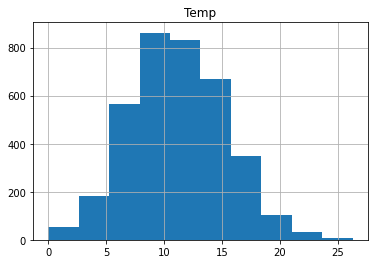

In [6]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset7.csv', header = 0, index_col = 0)
series.hist()
pyplot.show()

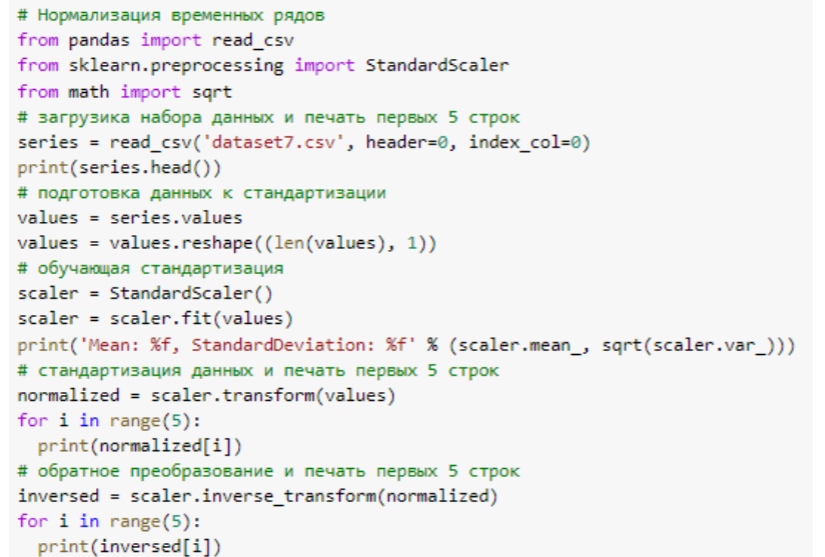

In [7]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt

series = read_csv('dataset7.csv', header = 0, index_col = 0)
print(series.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [8]:
values = series.values
values = values.reshape(len(values), 1)

In [9]:
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 11.177753, StandardDeviation: 4.071279


In [10]:
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

[2.33888328]
[1.65113873]
[1.87219948]
[0.84058266]
[1.13533032]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


# Задание

Провести нормализацию и стандартизацию во временных рядах
данных датасетов

Вариант 4

In [15]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

url='http://pogoda-service.ru/archive_gsod_res.php?country=BU&station=156610&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]
df

,ÐÐ°ÑÐ°,ÐÐ°ÐºÑÐ¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÐ¸Ð½Ð¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,Ð¡ÑÐµÐ´Ð½ÑÑ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÑÐ¼Ð¾ÑÑÐµÑÐ½Ð¾Ðµ Ð´Ð°Ð²Ð»ÐµÐ½Ð¸Ðµ,Ð¡ÐºÐ¾ÑÐ¾ÑÑÑ Ð²ÐµÑÑÐ°,ÐÑÐ°Ð´ÐºÐ¸,Ð­ÑÑÐµÐºÑÐ¸Ð²Ð½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°
0,01.12.2010,21.6,12.0,15.6,1005.5,3,0.0,14.4
1,02.12.2010,23.0,10.2,16.0,1006.1,5,0.0,13.5
2,03.12.2010,21.0,11.0,14.6,1009.4,3,0.0,13.0
3,04.12.2010,21.0,13.8,16.8,1005.3,3,0.0,14.9
4,05.12.2010,18.4,2.4,6.2,1011.8,4,3.0,2.5
...,...,...,...,...,...,...,...,...
995,22.08.2013,28.0,24.0,25.7,1011.5,5,0.0,25.1
996,23.08.2013,28.0,18.6,23.5,1010.7,3,0.0,23.8
997,24.08.2013,27.4,20.0,23.5,1010.7,3,0.0,24.3
998,25.08.2013,28.0,18.4,23.1,1009.7,3,0.0,23.9


In [16]:
df.drop(df.columns[[1,2,4,5,6,7]], axis = 1, inplace = True)
df

,ÐÐ°ÑÐ°,Ð¡ÑÐµÐ´Ð½ÑÑ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°
0,01.12.2010,15.6
1,02.12.2010,16.0
2,03.12.2010,14.6
3,04.12.2010,16.8
4,05.12.2010,6.2
...,...,...
995,22.08.2013,25.7
996,23.08.2013,23.5
997,24.08.2013,23.5
998,25.08.2013,23.1


In [17]:
df.columns = ['Дата', 'Средняя температура']
df

,Дата,Средняя температура
0,01.12.2010,15.6
1,02.12.2010,16.0
2,03.12.2010,14.6
3,04.12.2010,16.8
4,05.12.2010,6.2
...,...,...
995,22.08.2013,25.7
996,23.08.2013,23.5
997,24.08.2013,23.5
998,25.08.2013,23.1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Дата                 1000 non-null   object 
 1   Средняя температура  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [19]:
df['Дата']=df['Дата'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Дата                 1000 non-null   datetime64[ns]
 1   Средняя температура  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [20]:
df.isna().sum()

Дата                   0
Средняя температура    0
dtype: int64

In [21]:
df.set_index('Дата', inplace=True)
df.head()

,Средняя температура
Дата,
2010-01-12,15.6
2010-02-12,16.0
2010-03-12,14.6
2010-04-12,16.8
2010-05-12,6.2


In [22]:
from sklearn.preprocessing import MinMaxScaler
values = df.values
values = values.reshape(len(values), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: -7.300000, Max: 28.400000


In [23]:
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

[0.64145658]
[0.65266106]
[0.61344538]
[0.67507003]
[0.37815126]
[15.6]
[16.]
[14.6]
[16.8]
[6.2]


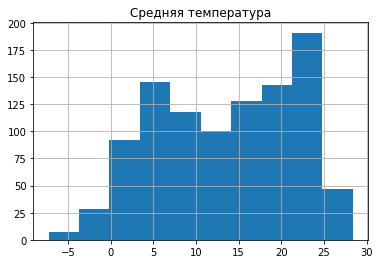

In [24]:
df.hist()
pyplot.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

values = df.values
values = values.reshape(len(values), 1)

scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 13.582900, StandardDeviation: 8.154325


In [26]:
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

[0.24736566]
[0.29641938]
[0.12473135]
[0.39452683]
[-0.90539682]
[15.6]
[16.]
[14.6]
[16.8]
[6.2]


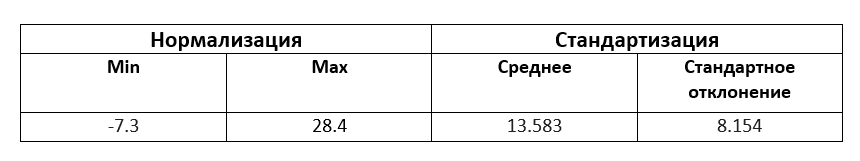